In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-genpact-hack-dec2018/meal_info.csv
/kaggle/input/av-genpact-hack-dec2018/fulfilment_center_info.csv
/kaggle/input/av-genpact-hack-dec2018/train.csv
/kaggle/input/av-genpact-hack-dec2018/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/av-genpact-hack-dec2018/train.csv')
test = pd.read_csv('/kaggle/input/av-genpact-hack-dec2018/test.csv')
centre_info = pd.read_csv('/kaggle/input/av-genpact-hack-dec2018/fulfilment_center_info.csv')
meal_info = pd.read_csv('/kaggle/input/av-genpact-hack-dec2018/meal_info.csv')

In [3]:
train_inner_join = pd.merge(train, meal_info, on = 'meal_id', how = 'inner')
train_inner_join = pd.merge(train_inner_join, centre_info, on = 'center_id', how = 'inner')
train_inner_join.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [4]:
test_inner_join = pd.merge(test, meal_info, on = 'meal_id', how = 'inner')
test_inner_join = pd.merge(test_inner_join, centre_info, on = 'center_id', how = 'inner')
test_inner_join.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [5]:
#one hot encoding the dataset
columns = ['category', 'cuisine', 'center_type']
train_modified = pd.get_dummies(train_inner_join, columns = columns)
test_modified = pd.get_dummies(test_inner_join, columns = columns)

In [6]:
y = train_modified['num_orders']
train_modified = train_modified.drop('num_orders', axis = 1)

#columns to drop
d_columns = ['id', 'week', 'center_id', 'meal_id', 'region_code']
df_train = train_modified.drop(d_columns, axis = 1)
df_test = test_modified.drop(d_columns, axis = 1)

In [7]:
df_test.shape

(32573, 27)

In [8]:
#to check all the columns are same
df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
#Models

from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes = 10, activation = 'relu', solver = 'adam', alpha = 0.0001)
fit = clf.fit(df_train[:-500], y[:-500])

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


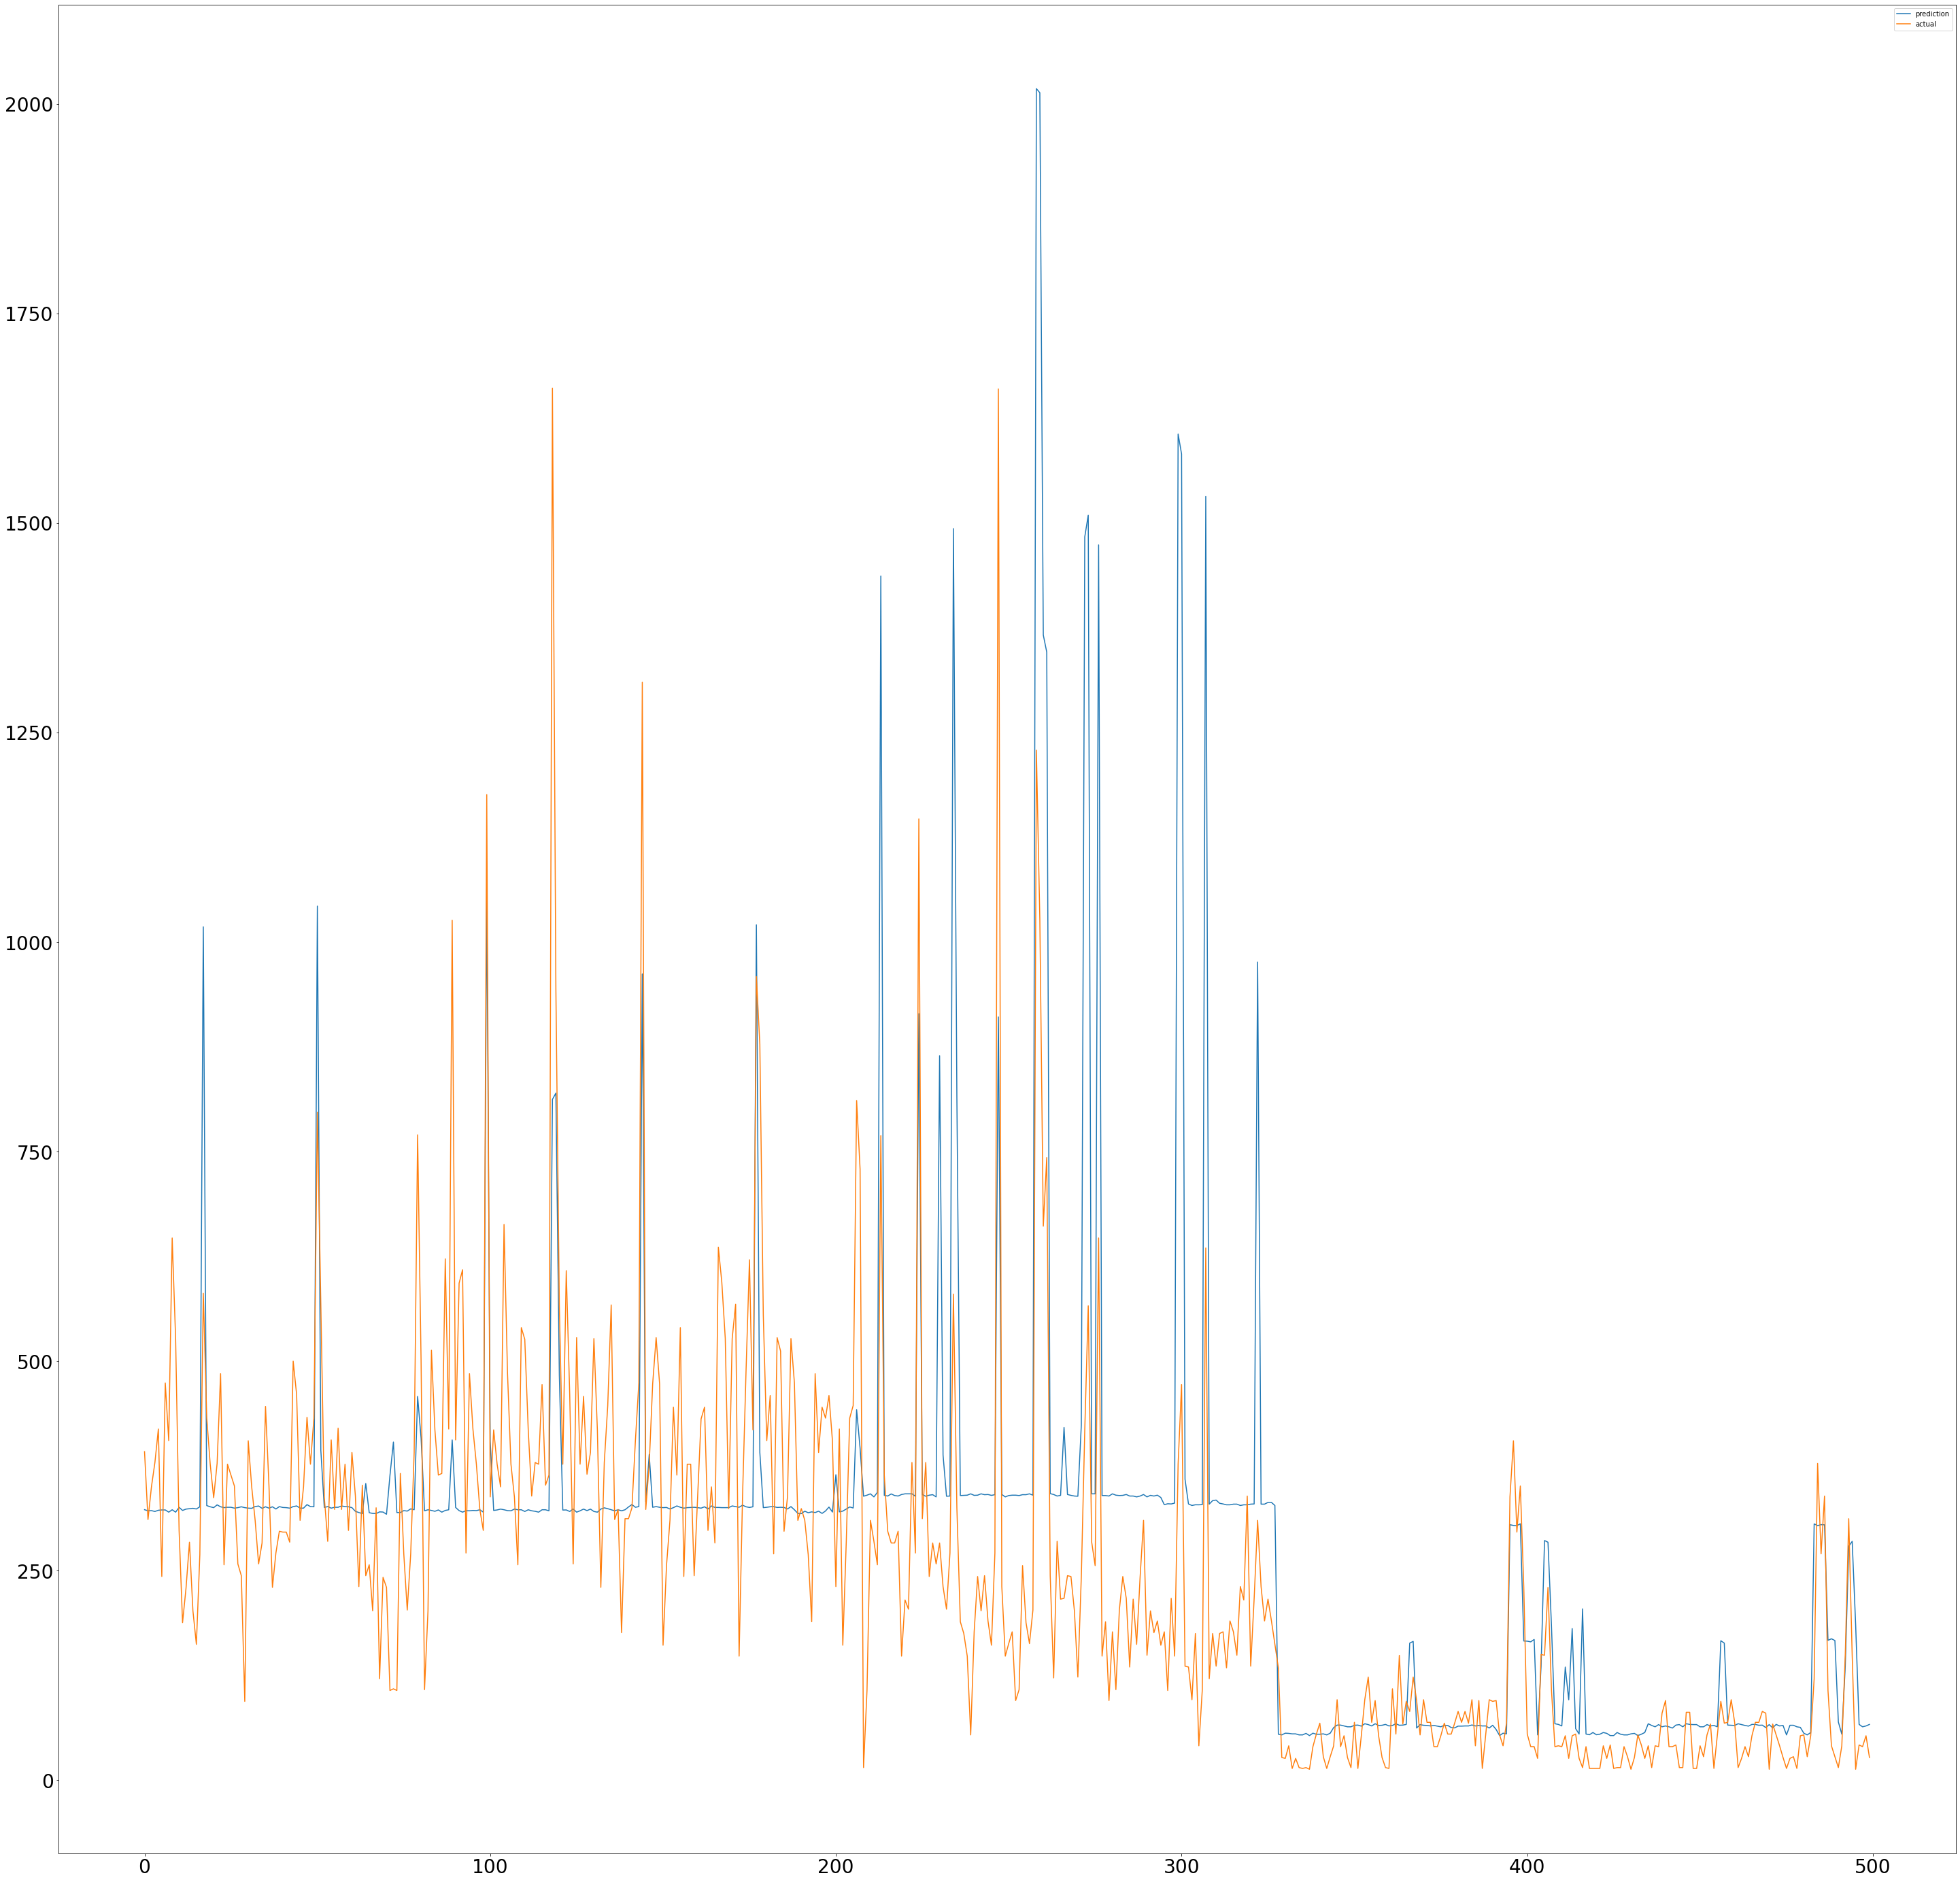

In [10]:
prediction = fit.predict(df_train[-500:])
x = [i for i in range(len(df_train[-500:]))]
import matplotlib.pyplot as plt
plt.figure(figsize =(50,50))
plt.plot(x,prediction)
plt.plot(x, y[-500:])
plt.legend(['prediction', 'actual'])
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()


83.08691723786211
2158.7318734736878
0.1104732324947254


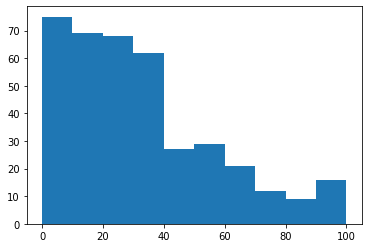

In [11]:
error = prediction - y[-500:]
error_percent = error/y[-500:]*100
plt.hist(abs(error_percent), bins = [0,10,20,30,40,50,60,70,80,90,100])
print(abs(error_percent).mean())
print(abs(error_percent).max())
print(abs(error_percent).min())

In [12]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
fit = clf.fit(df_train[:-500], y[:-500])

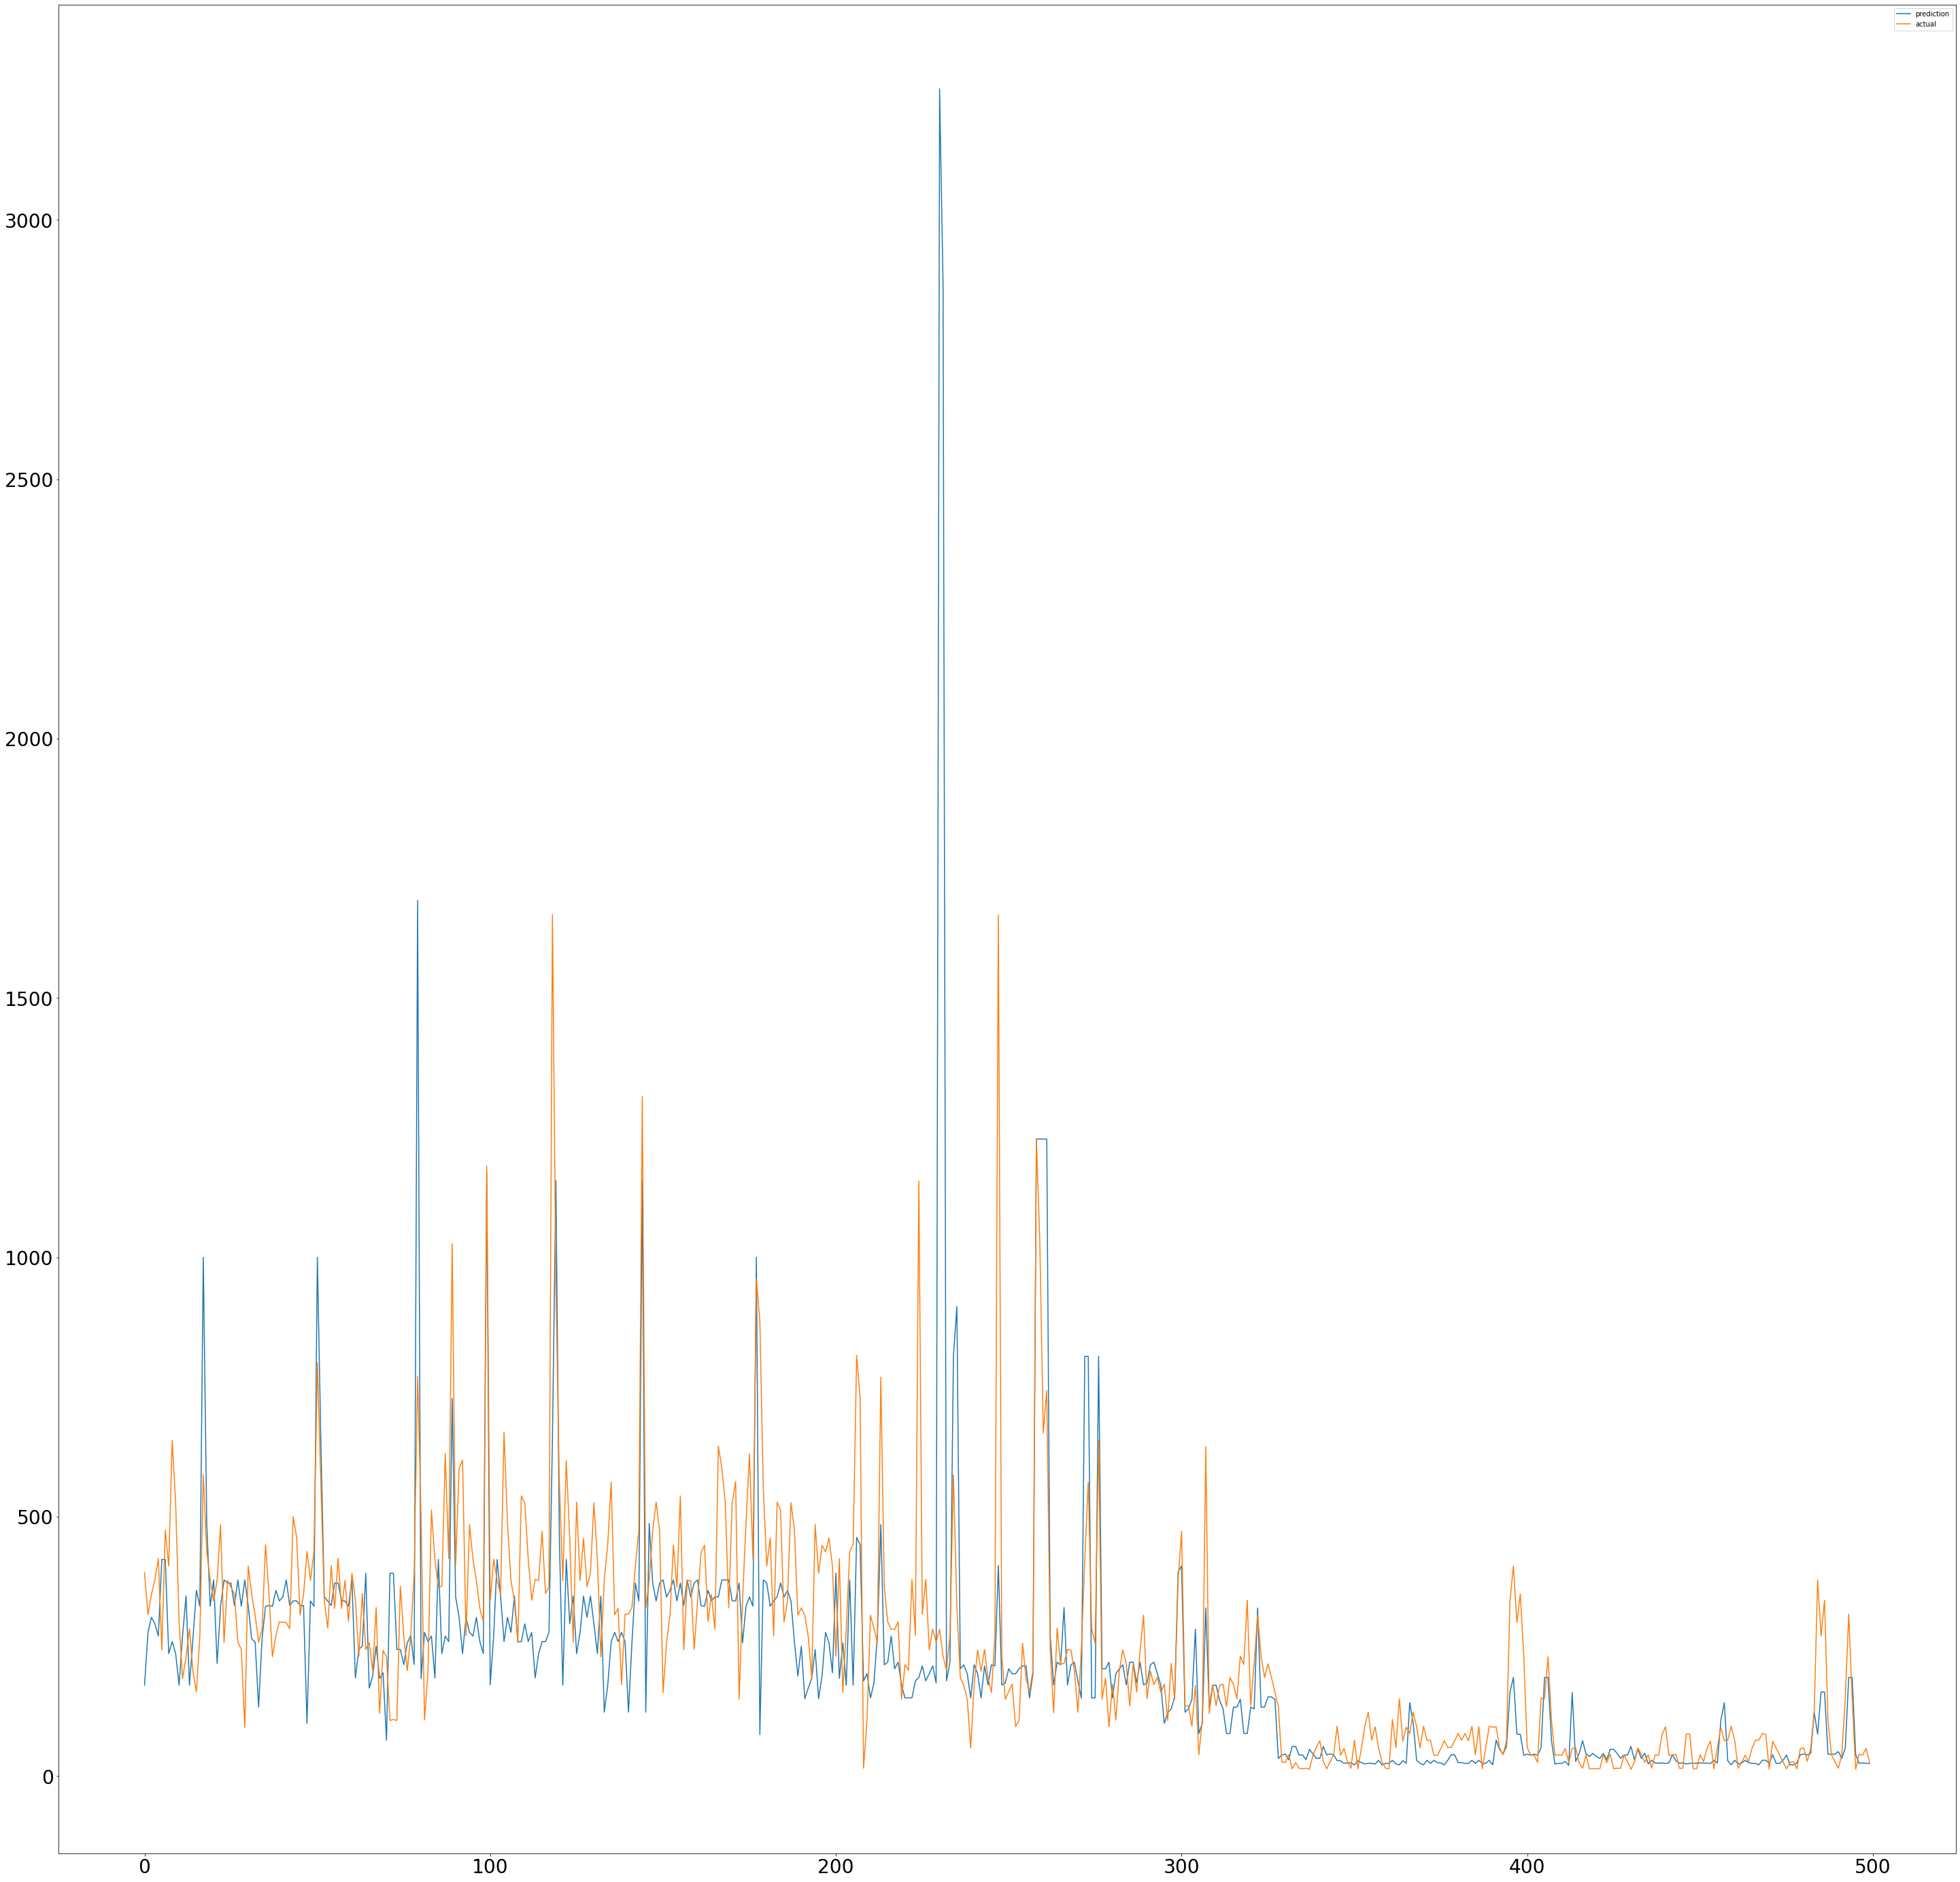

In [13]:
prediction = fit.predict(df_train[-500:])
x = [i for i in range(len(df_train[-500:]))]
import matplotlib.pyplot as plt
plt.figure(figsize =(50,50))
plt.plot(x,prediction)
plt.plot(x, y[-500:])
plt.legend(['prediction', 'actual'])
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()

52.936599141983216
1144.5887445887445
0.0


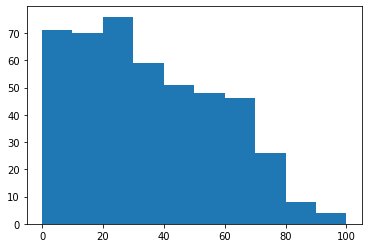

In [14]:
error = prediction - y[-500:]
error_percent = error/y[-500:]*100
plt.hist(abs(error_percent), bins = [0,10,20,30,40,50,60,70,80,90,100])
print(abs(error_percent).mean())
print(abs(error_percent).max())
print(abs(error_percent).min())

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.001, max_depth=1, random_state=0, loss='ls')
fit = clf.fit(df_train[:-500], y[:-500])

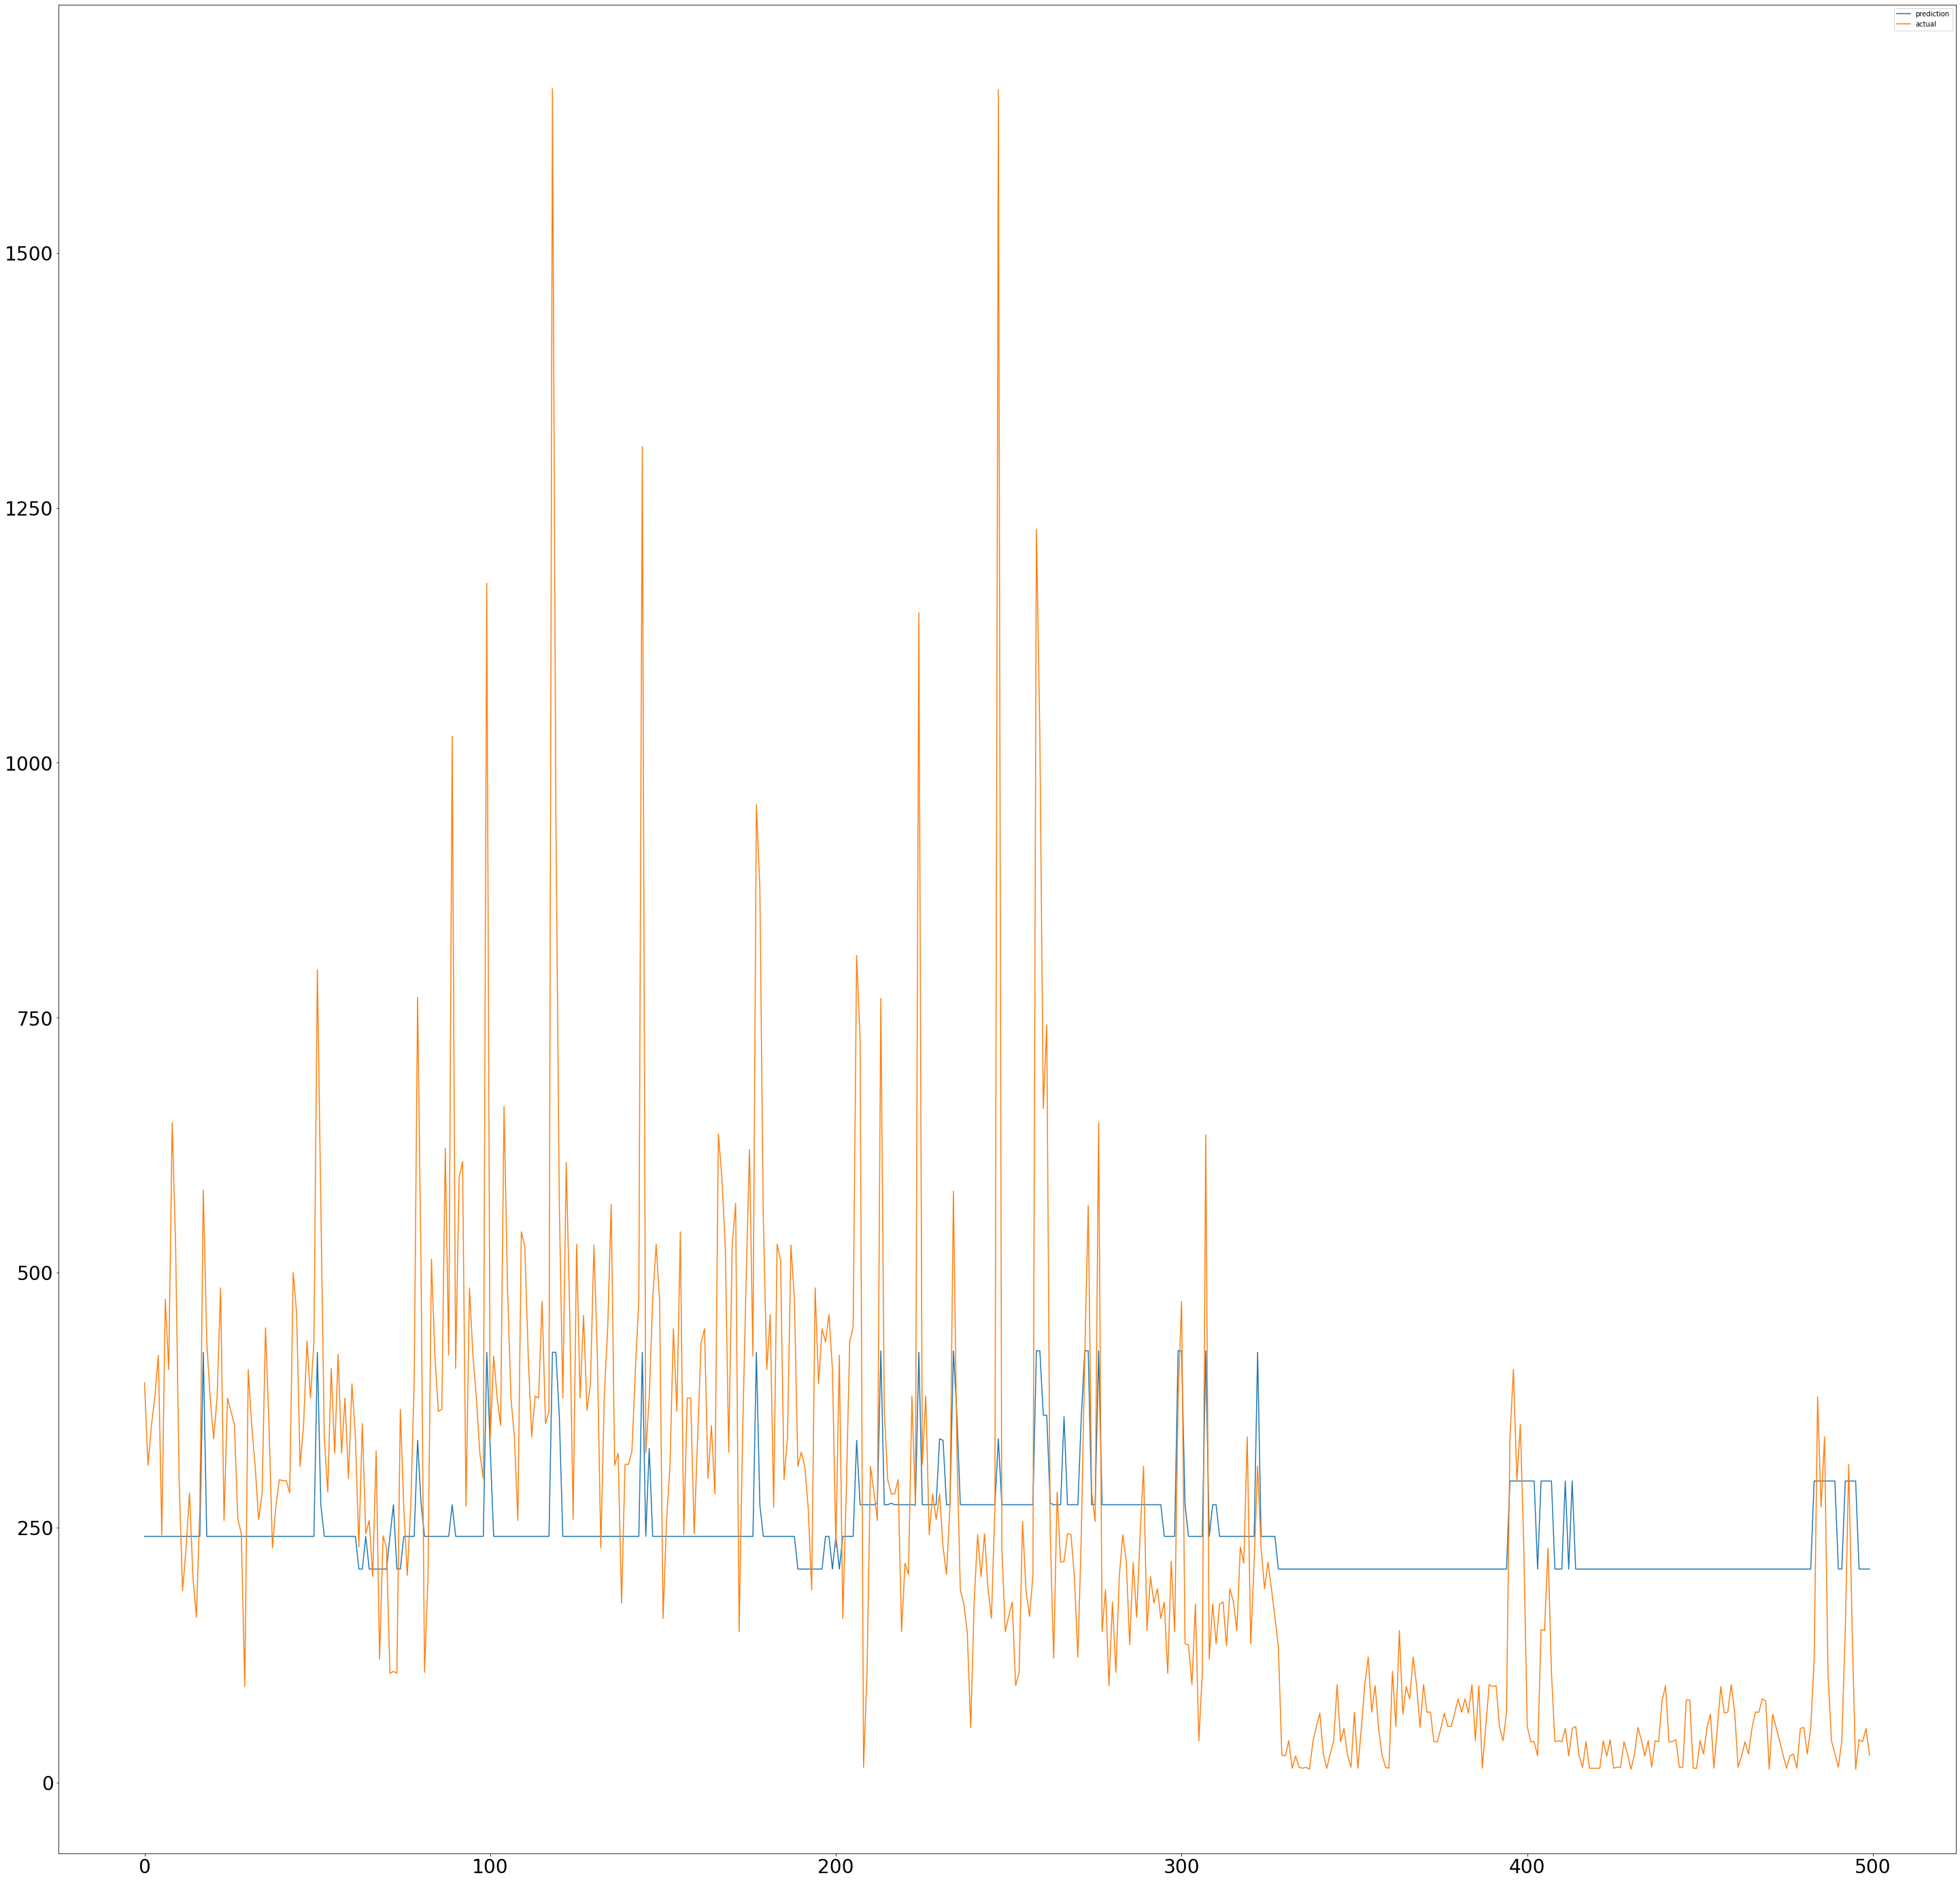

In [16]:
prediction = fit.predict(df_train[-500:])
x = [i for i in range(len(df_train[-500:]))]
import matplotlib.pyplot as plt
plt.figure(figsize =(50,50))
plt.plot(x,prediction)
plt.plot(x, y[-500:])
plt.legend(['prediction', 'actual'])
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()

210.63303999885667
2174.3119382723153
0.1146783866888493


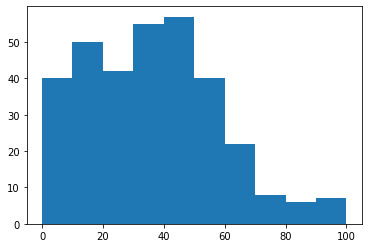

In [17]:
error = prediction - y[-500:]
error_percent = error/y[-500:]*100
plt.hist(abs(error_percent), bins = [0,10,20,30,40,50,60,70,80,90,100])
print(abs(error_percent).mean())
print(abs(error_percent).max())
print(abs(error_percent).min())

In [18]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state = 1)
fit = clf.fit(df_train[:-500], y[:-500])

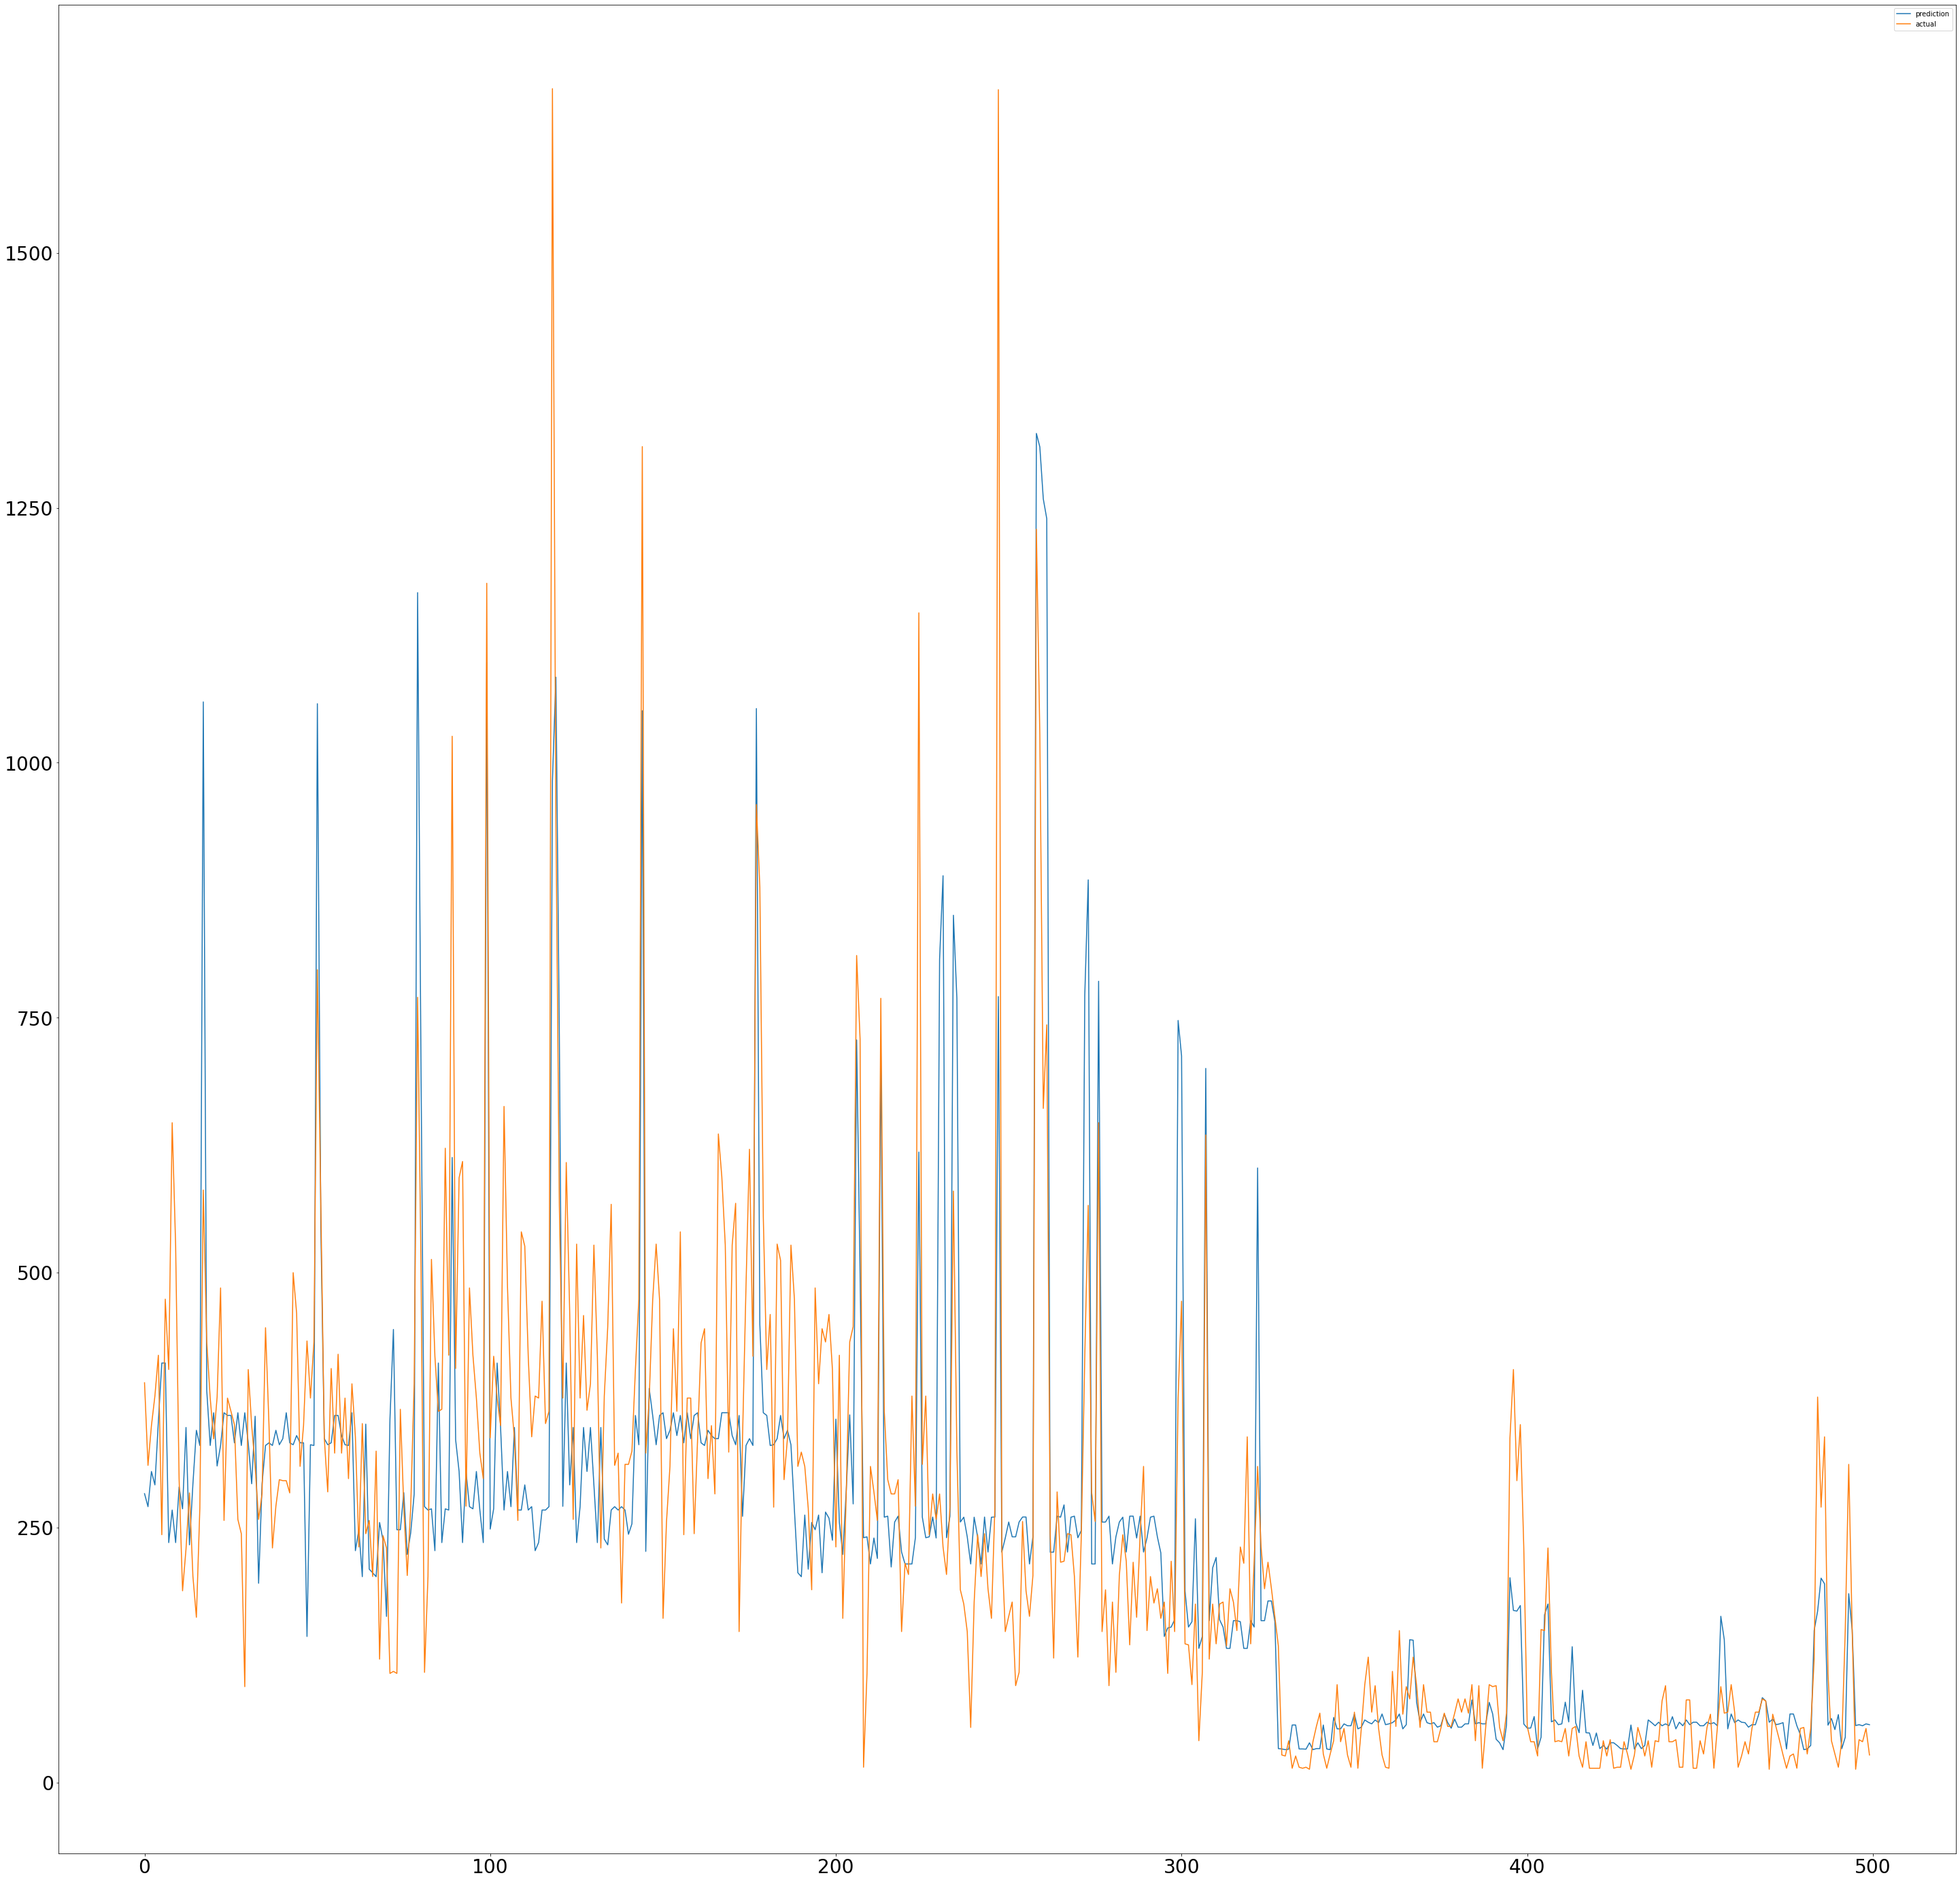

In [19]:
prediction = fit.predict(df_train[-500:])
x = [i for i in range(len(df_train[-500:]))]
import matplotlib.pyplot as plt
plt.figure(figsize =(50,50))
plt.plot(x,prediction)
plt.plot(x, y[-500:])
plt.legend(['prediction', 'actual'])
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()

54.42369466769008
1500.3734126984125
0.05336309523810811


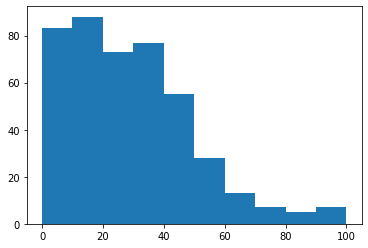

In [20]:
error = prediction - y[-500:]
error_percent = error/y[-500:]*100
plt.hist(abs(error_percent), bins = [0,10,20,30,40,50,60,70,80,90,100])
print(abs(error_percent).mean())
print(abs(error_percent).max())
print(abs(error_percent).min())